Followed the Tutorial: https://adventuresinmachinelearning.com/python-tensorflow-tutorial/

https://pythonprogramming.net/tensorflow-neural-network-session-machine-learning-tutorial/

Additional Documentation Sources:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
#Mounting google drive to store and save tensorflow model.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Fully Connected-Net for MNIST Classification

In [0]:
#Placeholders
epochs = 50
batch_size = 170

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [0]:
#Initialising Weights and Biases using He initialisation
W1=tf.Variable(tf.initializers.he_normal(seed=None)((784, 1024)))
b1 = tf.Variable(tf.random_normal([1024]), name='b1')

W2=tf.Variable(tf.initializers.he_normal(seed=None)((1024, 1024)))
b2 = tf.Variable(tf.random_normal([1024]), name='b2')

W3=tf.Variable(tf.initializers.he_normal(seed=None)((1024, 1024)))
b3 = tf.Variable(tf.random_normal([1024]), name='b3')

W4=tf.Variable(tf.initializers.he_normal(seed=None)((1024, 1024)))
b4 = tf.Variable(tf.random_normal([1024]), name='b4')

W5=tf.Variable(tf.initializers.he_normal(seed=None)((1024, 1024)))
b5 = tf.Variable(tf.random_normal([1024]), name='b5')

W6=tf.Variable(tf.initializers.he_normal(seed=None)((1024, 10)))
b6 = tf.Variable(tf.random_normal([10]), name='b6')




In [0]:
#Putting together Layers
hidden_1 = tf.add(tf.matmul(x, W1), b1)
hidden_1 = tf.nn.relu(hidden_1)
hidden_2 = tf.add(tf.matmul(hidden_1, W2), b2)
hidden_2 = tf.nn.relu(hidden_2)
hidden_3 = tf.add(tf.matmul(hidden_2, W3), b3)
hidden_3 = tf.nn.relu(hidden_3)
hidden_4 = tf.add(tf.matmul(hidden_3, W4), b4)
hidden_4 = tf.nn.relu(hidden_4)
hidden_5 = tf.add(tf.matmul(hidden_4, W5), b5)
hidden_5 = tf.nn.relu(hidden_5)
output=tf.add(tf.matmul(hidden_5, W6), b6)
y_ = tf.nn.softmax(output)



In [0]:
#Defining Loss Function- Trying different approaches to find the optimum one
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

# cross_entropy = tf.reduce_mean(
#     tf.nn.softmax_cross_entropy_with_logits_v2(
#         labels=y, logits=y_
#         ))

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_), reduction_indices=[1]))

In [7]:
#Adam Optimizer
optimize = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)
#tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cross_entropy)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Calculate Accuracy
init_op = tf.global_variables_initializer()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:

sess = tf.InteractiveSession()
saver = tf.train.Saver()
# with tf.Session() as sess:
  
   # initialise the variables
sess.run(init_op)
total_batch = int(len(mnist.train.labels) / batch_size)
# print(total_batch)
for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=128)
        _, c = sess.run([optimize, cross_entropy], 
                      feed_dict={x: batch_x, y: batch_y})
        avg_cost += c 
    print("Epoch:", (epoch + 1), "Cost =", "{:.2f}".format(avg_cost), "Train accuracy :", sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels}))
    save_path = saver.save(sess, "/content/gdrive/My Drive/dl_model.ckpt")
print("Test Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
  

sess.close()
   

Epoch: 1 Cost = 242.70 Train accuracy : 0.9428545
Epoch: 2 Cost = 97.72 Train accuracy : 0.9559636
Epoch: 3 Cost = 72.88 Train accuracy : 0.96747273
Epoch: 4 Cost = 58.92 Train accuracy : 0.97705454
Epoch: 5 Cost = 44.01 Train accuracy : 0.9818
Epoch: 6 Cost = 36.37 Train accuracy : 0.9829818
Epoch: 7 Cost = 31.81 Train accuracy : 0.9877273
Epoch: 8 Cost = 26.59 Train accuracy : 0.9928182
Epoch: 9 Cost = 21.85 Train accuracy : 0.99218184
Epoch: 10 Cost = 18.59 Train accuracy : 0.99316365
Epoch: 11 Cost = 16.77 Train accuracy : 0.9957273
Epoch: 12 Cost = 16.91 Train accuracy : 0.9958364
Epoch: 13 Cost = 11.51 Train accuracy : 0.9930364
Epoch: 14 Cost = 10.54 Train accuracy : 0.99774545
Epoch: 15 Cost = 10.69 Train accuracy : 0.99701816
Epoch: 16 Cost = 9.43 Train accuracy : 0.9953455
Epoch: 17 Cost = 8.88 Train accuracy : 0.9974727
Epoch: 18 Cost = 6.45 Train accuracy : 0.9974909
Epoch: 19 Cost = 7.54 Train accuracy : 0.99783635
Epoch: 20 Cost = 7.68 Train accuracy : 0.9974727
Epoch: 21

In [22]:
# Restore the session and do a feed forward on all layers and capture respective outputs

test_samples, test_labels = mnist.test.next_batch(1000)

# tf.reset_default_graph()
sess = tf.InteractiveSession()
saver.restore(sess, "/content/gdrive/My Drive/dl_model.ckpt")
  
layer1_out, layer2_out, layer3_out,layer4_out, layer5_out, y_out = sess.run([hidden_1, hidden_2, hidden_3, hidden_4, hidden_5, tf.argmax(y_,1)],feed_dict = {x: test_samples, y: test_labels})

sess.close()

INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/dl_model.ckpt


# Part 1.3

1000


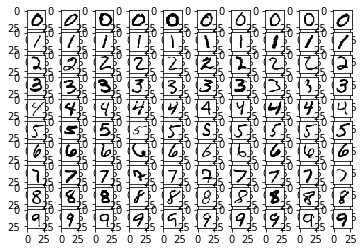

In [11]:

#output of softmax layer y_out 
import itertools
print(len(y_out))
def visualize(layer_output):
  fig, axes = plt.subplots(nrows=10, ncols=10)
#   axes.set_xticks([])
#   axes.set_yticks([])
   
  indexes = []
  [indexes.append(list((np.where(layer_output == row)[0]))) for row in range(10) ]
  try:[axes[row,col].imshow(test_samples[indexes[row][col],:].reshape((28,28)), cmap='binary')  for row, col in itertools.product(range(10), range(10)) if col < len(indexes[row]) ]
    
  except IndexError: pass
  plt.show(block=False)
  return
# print(y_out)
visualize(y_out)


# Part 1.4

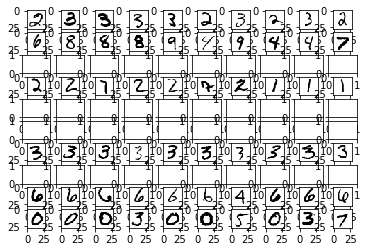

In [12]:
#random dimension sampling for second to last layer

hidden5_out= np.argmax(layer5_out[:,np.random.randint(1024,size=(10))], axis=1)
visualize(hidden5_out)


Explain your observation compared with the results from 1.3. What can
you see? What would have been the ideal situation for this second-to-
the-last layer? 

In 1.3 the classification being near perfect with high accuracy above 98% gave a good visualization for the output layer with correctly classified images corresponding to the individual rows in the plot. Whereas in the current layer the network has not learned the feature space properly to correctly classify the images and fails to produce an accurate representation of input image samples in the underlying plot. 

In the plot we can see that 3,5,6 & 7th rows are completely devoid of images. Also the calssification is going haywire because of poor feature selection in the second to last layer.

This happens because the features required to activate specific neurons in the second to last layer are absent in the image fed to the network.

We can avoid this by uniform feature selection from the input samples that contain similar patterns to avoid misclassification as well as non-active neurons in the layer.


# Part 1.5 - 1.6

In [0]:
#Helper Functions for PCA , TSNE and scatter plot the results.

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


labels =[]
for i  in range(len(test_labels)):
    labels.append(np.argmax(test_labels[i]))


def pca(data):
  reduced = PCA(n_components= 2).fit_transform(data)
  return reduced

def tsne(data):
  embedded = TSNE(n_components=2).fit_transform(data)
  return embedded


def scatter_plot(dim,data):
  fig= plt.figure(figsize=(12,12))
  plt.rcParams['font.size'] = 20
  axes = fig.add_subplot(1,1,1)
#   plt.ylim(80, 80)
  scatter = axes.scatter(dim[:,0],dim[:,1], c =data,cmap=plt.cm.get_cmap('nipy_spectral', 10) )
#   legend1, = axes.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Classes")
#   axes.add_artist(legend1)
#   plt.legend(loc='upper left')
  index = np.argmax(test_labels,axis=1)
#   print(index.shape)
  for i in range(10):
      class_label=str(i)
      indx = list(np.where(index == i)[0])
      x,y = (np.mean(dim[indx], axis =0))
      axes.annotate(class_label, xy=(x,y))
  
  return 





# PCA_Plot Test Sample

(1000, 2)


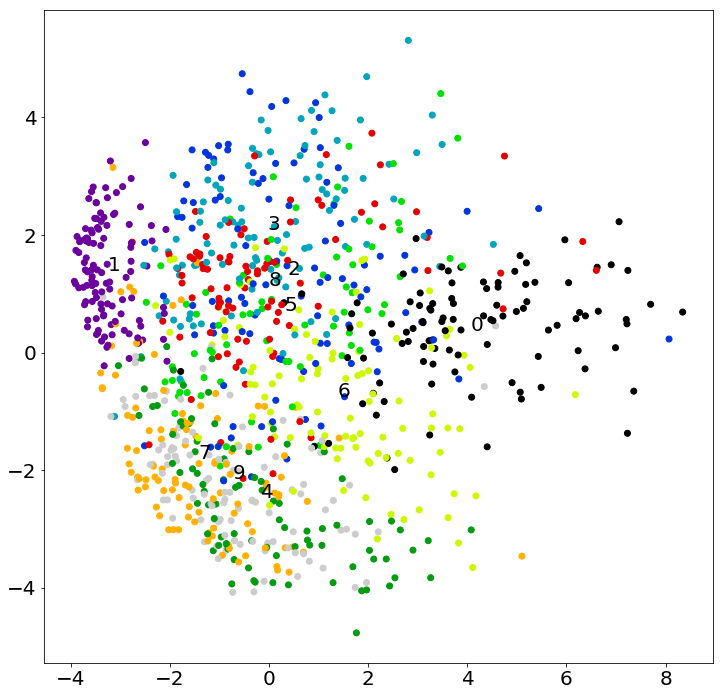

In [14]:

print(pca(test_samples).shape)
scatter_plot(pca(test_samples),labels)

# TSNE_Plot Test Samples

(1000, 2)


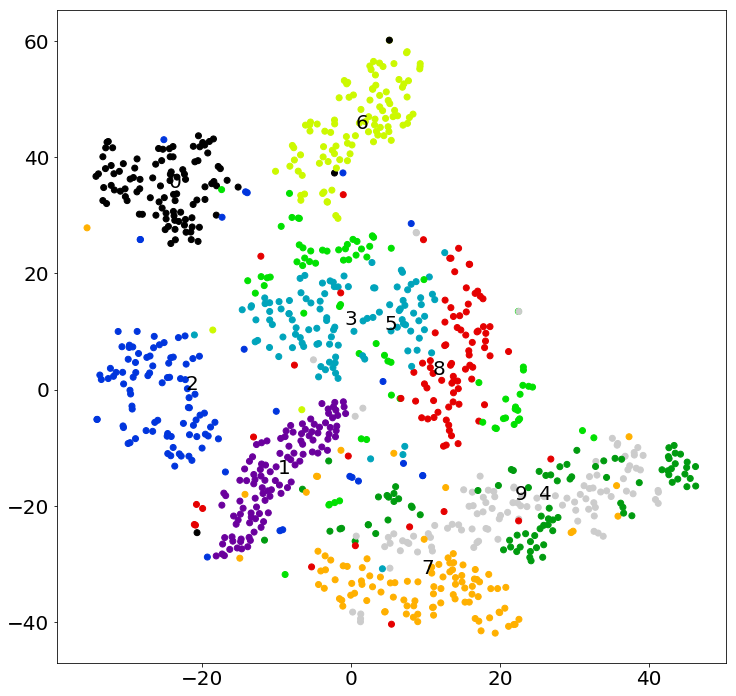

In [15]:

print(tsne(test_samples).shape)
scatter_plot(tsne(test_samples),labels)


**Do you think this raw image samples are easy to classify?**



*   **PCA**



> After visualizing the scatter plot for PCA otput, we can observe that the raw image samples are not easy to classify at all. They have a significant overlap amongst their individual clusters, which prevents the network from easily classifying them into different classes.


*   **TSNE**


> The TSNE plot shows better performance at embedding the dimensions of the test samples, and shows significant scope over PCA at classifying the input samples. Yet, the input samples still do not possess any hard decision boundaries and are scattered all over.




# TSNE on all layers

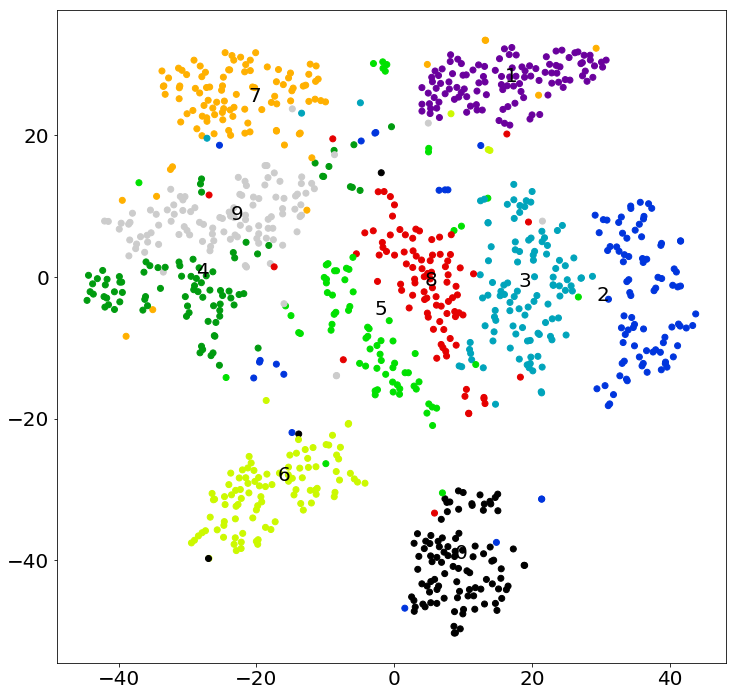

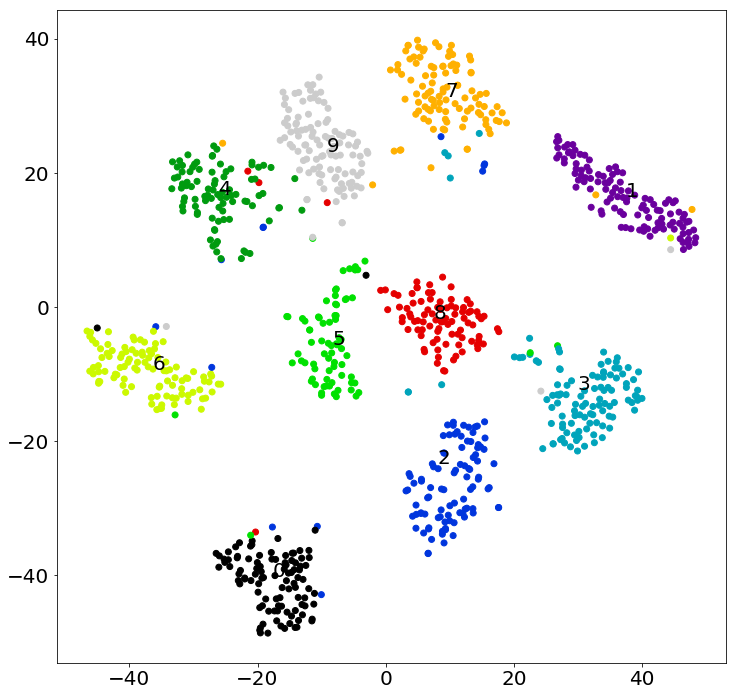

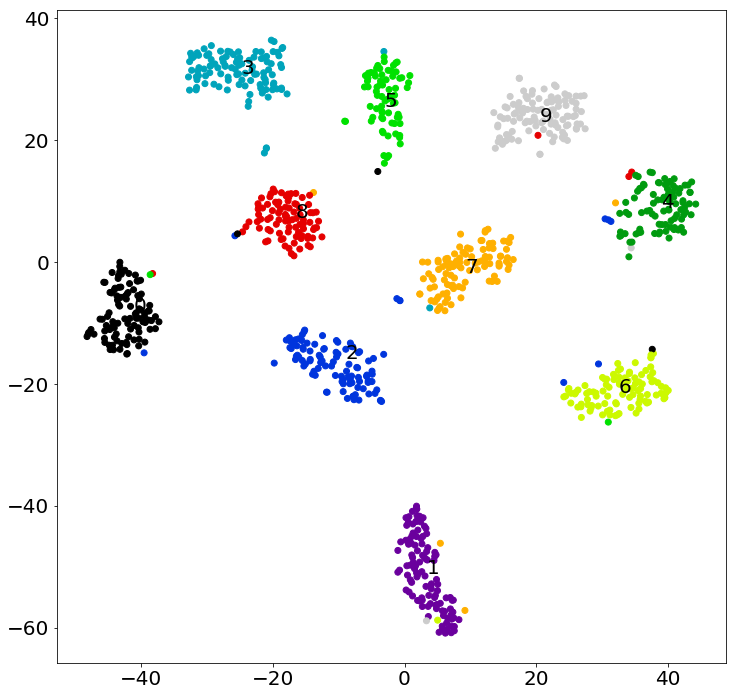

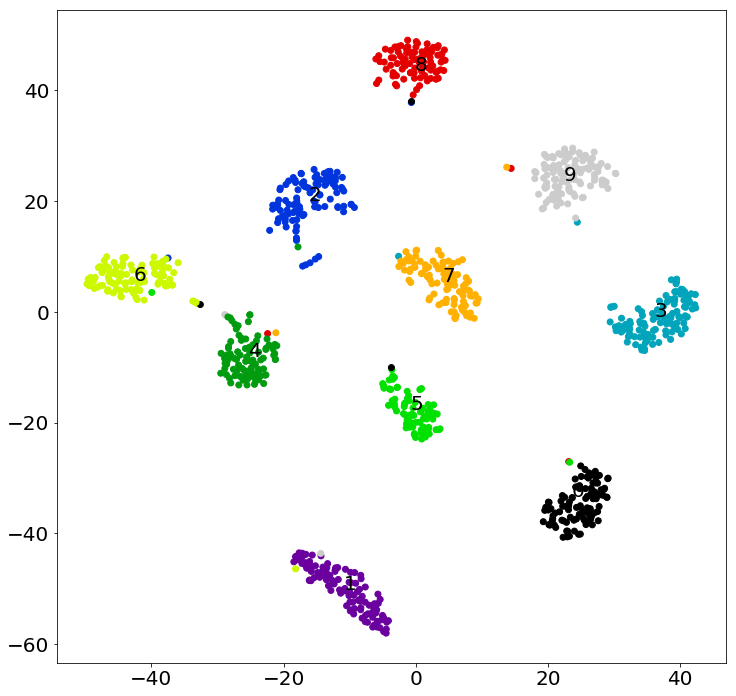

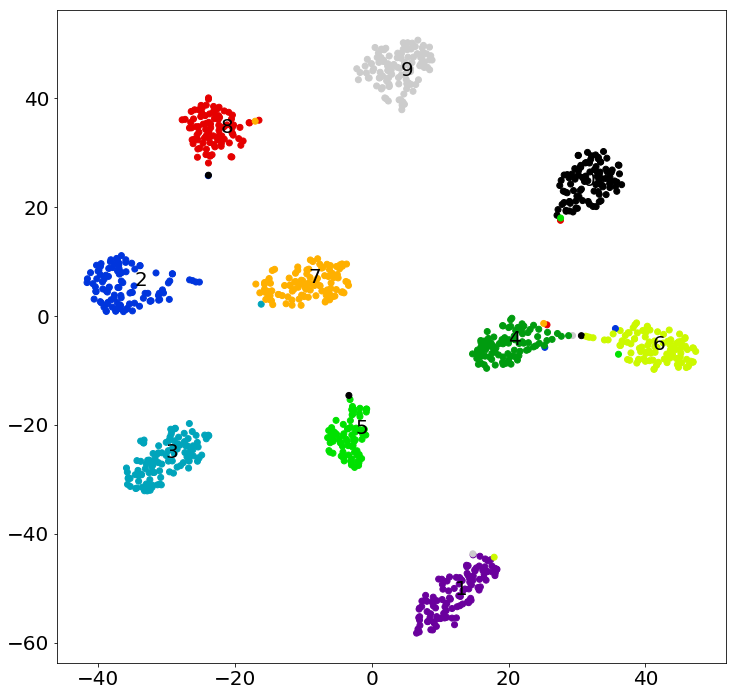

In [16]:
scatter_plot(tsne(layer1_out),labels)
scatter_plot(tsne(layer2_out),labels)
scatter_plot(tsne(layer3_out),labels)
scatter_plot(tsne(layer4_out),labels)
scatter_plot(tsne(layer5_out),labels)

# PCA on All Layers

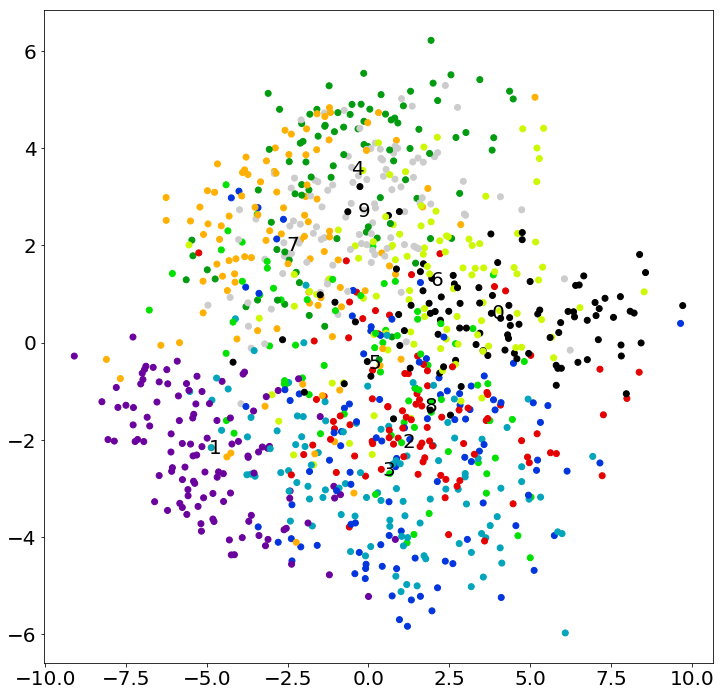

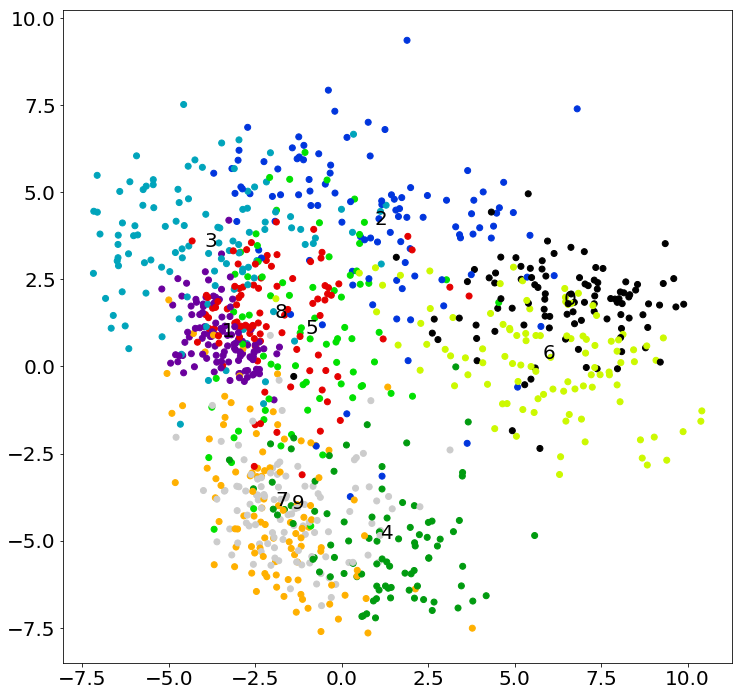

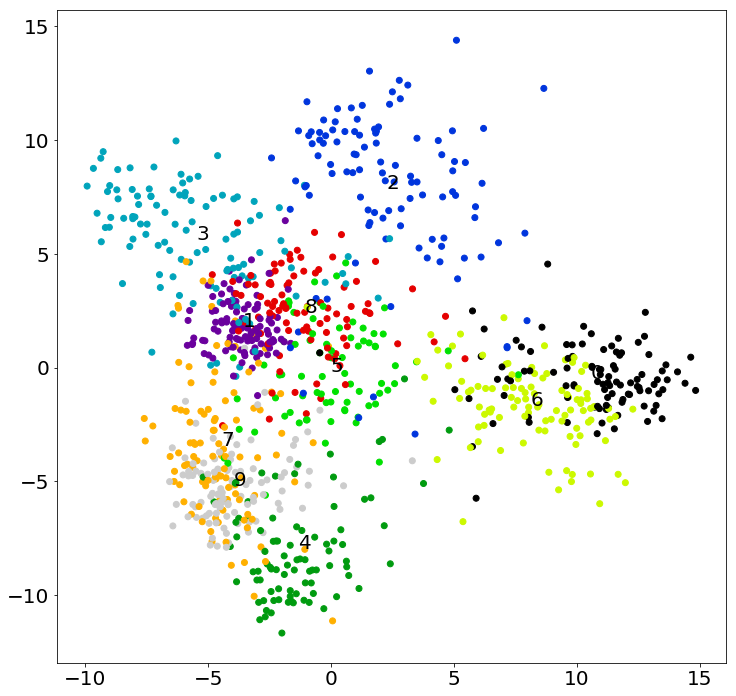

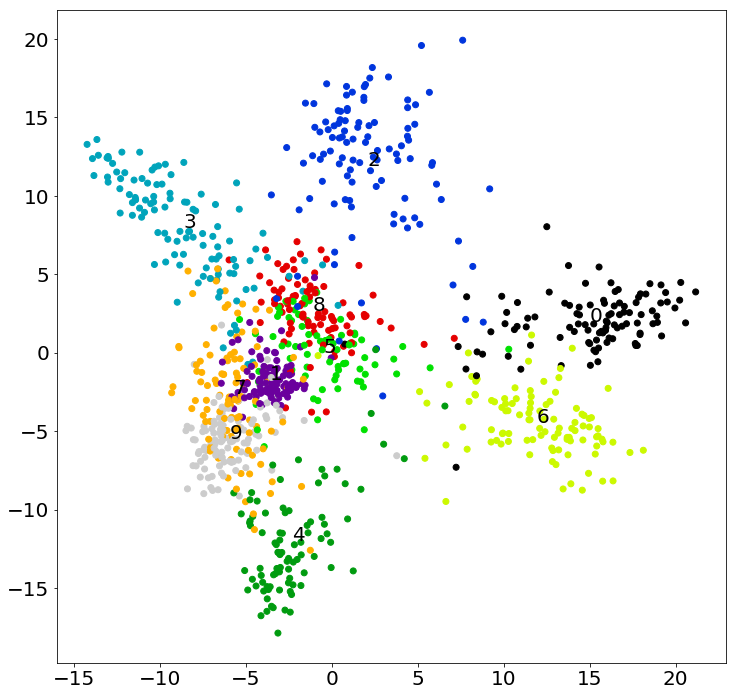

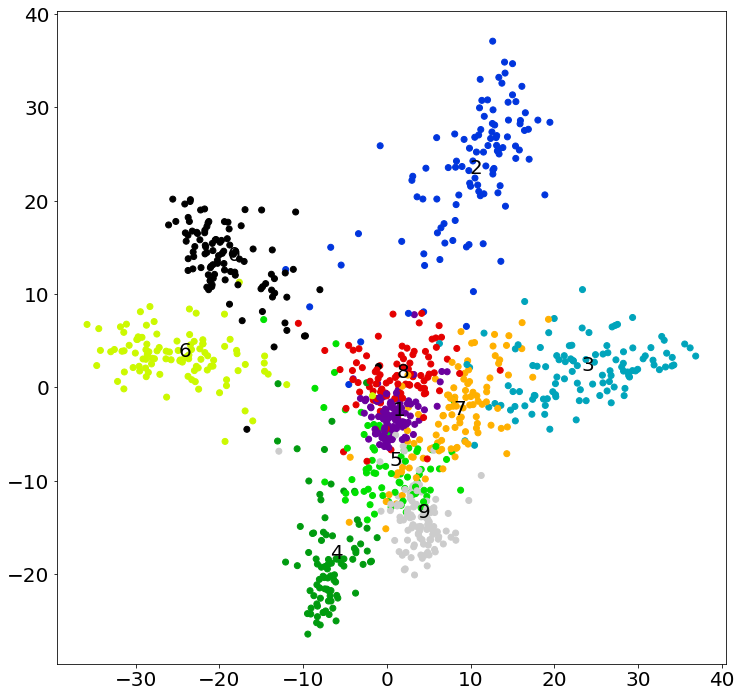

In [17]:
scatter_plot(pca(layer1_out),labels)
scatter_plot(pca(layer2_out),labels)
scatter_plot(pca(layer3_out),labels)
scatter_plot(pca(layer4_out),labels)
scatter_plot(pca(layer5_out),labels)



** Explain your observation.**

TSNE easily outperfdorms PCA for MNIST classification by presenting better clusters for the underlying classes. PCA improves after each layer, but fails to catch up with the efficiency of TSNE. This is easily understandable as PCA is an Unsupervised dimensionality reduction technique which clusters the similar data points based on the feature correlation between them, without taking into account any labels.

TSNE uses probabilistic methods to perform dimensionality reduction, thereby keeping the divergence between dimensionality reduced distribution and original distribution to a minimum. This correlation allows it to perform better at classifying the input samples even after reducing the dimensions.

# Final Layer Output Plots

In [18]:
sess = tf.InteractiveSession()
saver.restore(sess, "/content/gdrive/My Drive/dl_model.ckpt")
  
output_layer= sess.run(output ,feed_dict = {x: test_samples})
softmax_output=sess.run(tf.argmax(y_,1),feed_dict = {x: test_samples})

sess.close()

INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/dl_model.ckpt


In [19]:
print(softmax_output.shape)
print(output_layer.shape)

(1000,)
(1000, 10)


# PCA Final Layer Plot

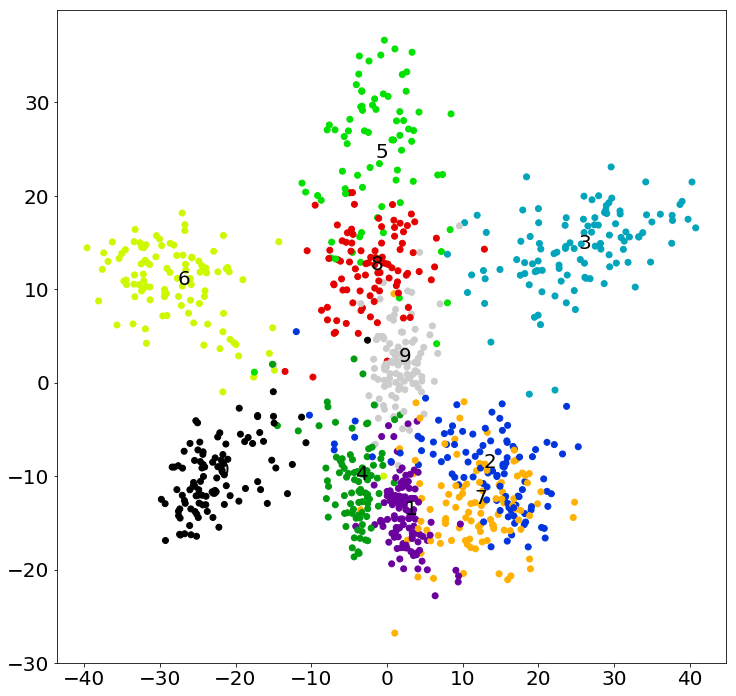

In [20]:

scatter_plot(pca(output_layer),labels)


# TSNE Final Layer Plot

(1000, 10)


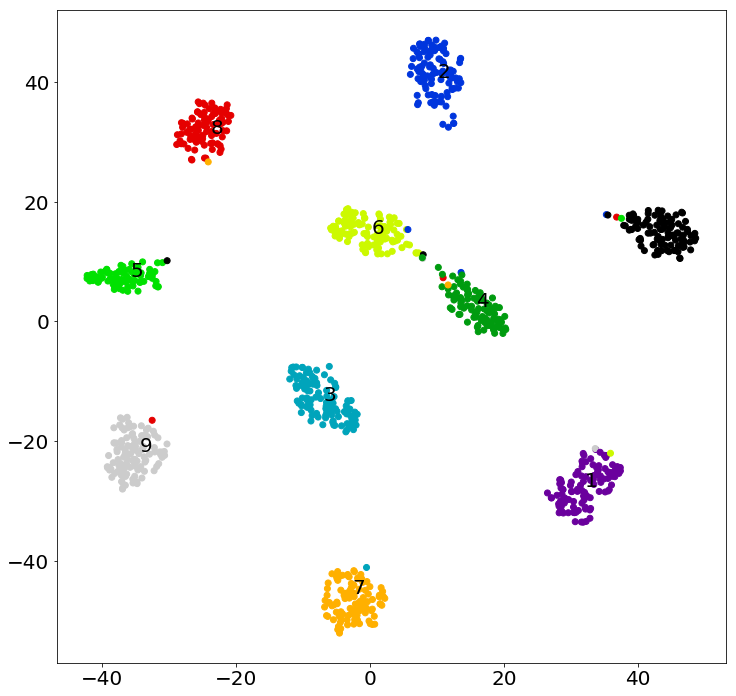

In [21]:
scatter_plot(tsne(output_layer),labels)
print(output_layer.shape)
# scatter_plot(tsne(softmax_output.reshape(-1,1)),labels)



The TSNE output for the final layer is better than the PCA as observed in the visualization. Although we can still observe some misclassified outputs in the TSNE plot as well.